# Solución Taller 1 Astrofísica
### Juan Diego Figueroa Hernández 2200815

# Ecuación Lane-Emden 

Nosotros queremos solucionar numéricamente la ecuación de Lane-Emden:
$$ \frac{1}{\xi^2} \frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right)=-\theta^n$$
donde
$$\xi=\alpha r \qquad \mathrm{and} \qquad \theta=\left(\frac{\rho}{\rho_c}\right)^{1/n}   $$

## Taller
1) Muestre que para $\xi\sim 0$, se tiene
$$\theta\approx 1-\frac{1}{6}\xi^2+\frac{n}{120}\xi^4$$

2) Muestre que la masa de la estrella esta dada por:
$$M=\frac{1}{\sqrt{4\pi}}\left(\frac{n+1}{G}\right)^{3/2}\frac{P_c^{3/2}}{\rho_c^2}\left[-\xi^2\frac{d\theta}{d\xi}\right]_{\xi_1}$$
con $R=\alpha\xi_1$.

3) Muestre que la presión central es:
$$P_c=\frac{1}{4\pi(n+1)}\frac{GM^2}{R^4}\left[\frac{d\theta}{d\xi}\right]^{-2}_{\xi_1}$$



## Desarrollo
**1)** Desarrollamos por taylor:

$$ \theta(\xi \sim 0)  =1+\theta_{2} \xi^{2} + \theta_{3} \xi^{3} +  \theta_{4} \xi^{4}  $$
aproximamos
$$\theta^{n}=1+n\theta_{2}\xi^{2}$$
reemplazamos en la ecuación Lane-Emden
$$\frac{1}{\xi^2}\frac{d}{d\xi}(\xi^2 (2\theta_{2}\xi + 3\theta_{3}\xi^{2} + 4\theta_{4}\xi^{3}))=-1-n\theta_{2}\xi^2$$
$$6\theta_{2}\xi^2+12\theta_{3}\xi^3+20\theta_{4}\xi^4=-\xi^2 (1+n\theta_2\xi^2)$$
de esta última ecuación se obtienen las siguientes expresiones:
$$\theta_{2}=-\frac{1}{6} \\ \theta_{3}=0 \\ \theta_{4}=\frac{n}{120}$$
finalmente reemplazamos en la primera ecuación y obtenemos que:
$$\theta(\xi)\approx1-\frac{1}{6}\xi+\frac{n}{120}\xi$$

**2)** Se usa la ecuación de equilibrio hidrodinámico para integrar la masa reemplazando las variables $r$ y $\rho$:

$$M=\int_{0}^{\frac{R}{\alpha}}4\pi\alpha^3\xi^2\rho_c\theta^nd\xi=4\pi\alpha^3\rho_c\int_{0}^{\frac{R}{\alpha}}\xi^2(\frac{-1}{\xi^2}\frac{d}{d\xi}(\xi^2\frac{d\theta}{d\xi}))d\xi=4\pi\alpha^3\rho_c(-\xi^2\frac{d\theta}{d\xi})|_{\xi_1}$$

reemplazamos $\alpha$ y $P=k\rho^{1+\frac{1}{n}}$

$$M=\frac{1}{\sqrt{4\pi}}\left(\frac{n+1}{G}\right)^{3/2}\frac{P_c^{3/2}}{\rho_c^2}\left[-\xi^2\frac{d\theta}{d\xi}\right]_{\xi_1}$$

**3)** Se usa la ecuación de la masa elevada al cuadrado, la ecuación de $\alpha^2$, y la función de estado polítropa

$$M^2 = \frac{1}{4\pi} \left(\frac{n+1}{G}\right)^3\frac{P_cP_c^2}{\rho_c^4}\frac{R^4}{\alpha^4}\left(\frac{d\theta}{d\xi}\right)^2_{\xi_1}\,$$

$$\alpha^2 = (n+1)K\frac{\rho_c^{1/n-1}}{4\pi G}=(n+1)K\frac{\rho_c^{1/n}}{4\pi G \rho_c}\, $$

$$P_c = K\rho_c^{1+1/n}\,$$

se reemplaza $\alpha^4$ y se halla $P_c^2$ en el desarrollo algebraico para obtener lo siguiente

\begin{equation}
\begin{aligned}
\left(\frac{d\theta}{d\xi}\right)^{-2}_{\xi_1}\frac{4\pi M^2}{R^4} & =\left(\frac{n+1}{G}\right)^3\frac{P_cP_c^2}{\rho_c^4}\frac{1}{\alpha^4} = \left(\frac{n+1}{G}\right)^3\frac{P_cP_c^2}{\rho_c^4} \frac{(4\pi)^2 G^2 \rho_c^2}{(n+1)^2K^2\rho_c^{2/n}}= \left(\frac{n+1}{G}\right)\frac{P_cP_c^2}{\rho_c^2} \frac{(4\pi)^2}{K^2\rho_c^{2/n}}\,.
\end{aligned}
\end{equation}

observese que $P_c^2$ aparece en el denominador así que se puede obtener la siguiente expresión al simplificar

\begin{equation}
\begin{aligned}
\left(\frac{d\theta}{d\xi}\right)^{-2}_{\xi_1}\frac{4\pi M^2}{R^4} = \frac{n+1}{G}\frac{P_c}{\rho_c^2} K^2\rho_c^2\rho_c^{2/n}\frac{(4\pi)^2}{K^2\rho_c^{2/n}} = \frac{n+1}{G}P_c(4\pi)^2\,.
\end{aligned}
\end{equation}

Finalmente al despejar se obtiene que:

$$P_c = \frac{1}{4\pi(n+1)}\frac{GM^2}{R^4} \left(\frac{d\theta}{d\xi}\right)^{-2}$$

In [3]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt


#Constants 
G = 6.6732e-11
k_B=1.38E-23
Msol=2*(10**30)
Rsol=6.96*(10**8)

Para solucionar la ecuación de Lane-Emden numéricamente, esta se reescibre como:
\begin{eqnarray}
\frac{dy}{d\xi}&=& z\\
\frac{dz}{d\xi}&=&-\frac{2}{\xi}z-y^n
\end{eqnarray}
con $y=\theta$ y $z=\theta'$.

In [16]:
class Polytrope:
    
    def __init__(self, n, h0=1.e-2, tol=1.e-12):
        self.n = n
        self.xi = []
        self.theta = []
        self.dtheta_dxi = []
        
        self._integrate(h0, tol)

    def _integrate(self, h0, tol):
        """Función para integrar la ecuación de Lane-Emden con método de RK """

        # q = (y(r_0), z(r_0))
        q = np.zeros(2, dtype=np.float64)
        
        xi = h0
        h = h0

        # condiciones iniciales 
        q[0] = 1.0-xi**2/6.0 + self.n*xi**4/120.0 #1.0
        q[1] = -xi/3.0 + self.n*xi**3/30.0 #0.0

        while h > tol:
            # 4th order RK integration 
            k1 = self._rhs(xi, q)
            k2 = self._rhs(xi+0.5*h, q+0.5*h*k1)
            k3 = self._rhs(xi+0.5*h, q+0.5*h*k2)
            k4 = self._rhs(xi+h, q+h*k3)

            # update the solution to the new xi
            q += (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
            xi += h

            # El paso de intragración se adapta para que theta>0.
            R_est = xi - q[0]/q[1]

            if xi + h > R_est:
                h = -q[0]/q[1]

            # guardar la solución:
            self.xi.append(xi)
            self.theta.append(q[0])
            self.dtheta_dxi.append(q[1])

        self.xi = np.array(self.xi)
        self.theta = np.array(self.theta)
        self.dtheta_dxi = np.array(self.dtheta_dxi)

    def _rhs(self, xi, q):
        """ the righthand side of the LE system, q' = f"""

        f = np.zeros_like(q)

        # y' = z
        f[0] = q[1]
        
        # z'
        f[1] = -2.0*q[1]/xi - q[0]**self.n

        return f

    def get_params(self):
        """ xi_1,and [-xi**2 theta']_{xi_1} """
        xi1 = self.xi[-1]
        p2 = -xi1**2 * self.dtheta_dxi[-1]
        p3 = self.dtheta_dxi[-1]
        XX=self.xi
        YY=self.theta**self.n
        return xi1, p2, p3, XX, YY

    def plot(self):
        """ Grafica de theta(xi) y rho/rho_c """
        fig = plt.figure(figsize=(15,5))
        labelxp = '='.join(['$\mathrm{n}',str(self.n)])
        labelxp = ' '.join([labelxp,'$'])
                            
        ax = fig.add_subplot(121)
        ax.plot(self.xi, self.theta, label=labelxp)
        ax.set_xlabel('$\\xi$')
        ax.set_ylabel('$\\theta$')
        plt.legend()
        ax = fig.add_subplot(122)
        ax.plot(self.xi, self.theta**self.n, label=labelxp)
        ax.set_xlabel('$\\xi$')
        ax.set_ylabel('$\\rho/\\rho_c$')
        ax.legend(frameon=False)
        return fig



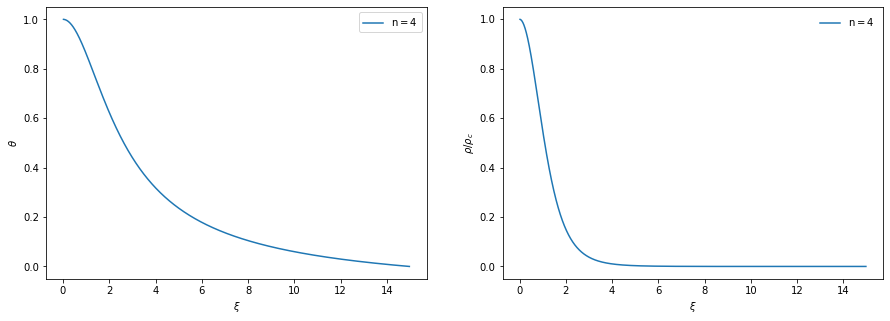

In [5]:
p = Polytrope(4)
fig=p.plot()

4) Grafique $\theta$ en función de $\xi$ para $n=0,1,2,3,4,5$.

5) Calcule $\rho_c$, $P_c$, y $K$ para una estrella con $M=M_\odot$ y $R=R_\odot$. Suponga $n=3$.

6) Calule $P$, $\rho$ y $T$ en funcion de $r/R$. Suponga un gas fromado por $X=0.55$ y $Y=0.45$.

7) Muestre que la energía gravitacional de la estrella es:
$$\Omega= -\frac{3}{5-n}\frac{GM^2}{R}$$

**Solución #4**

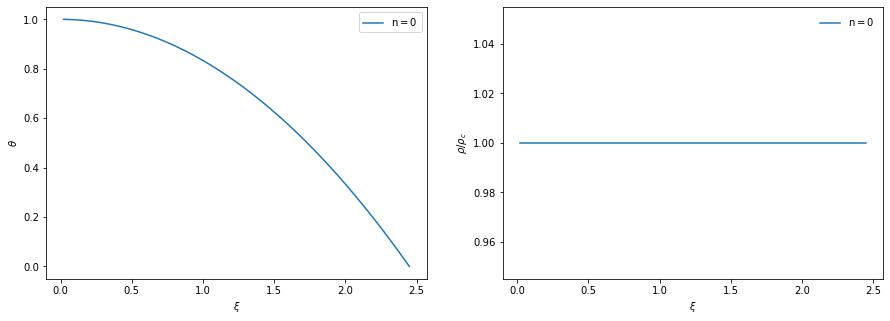

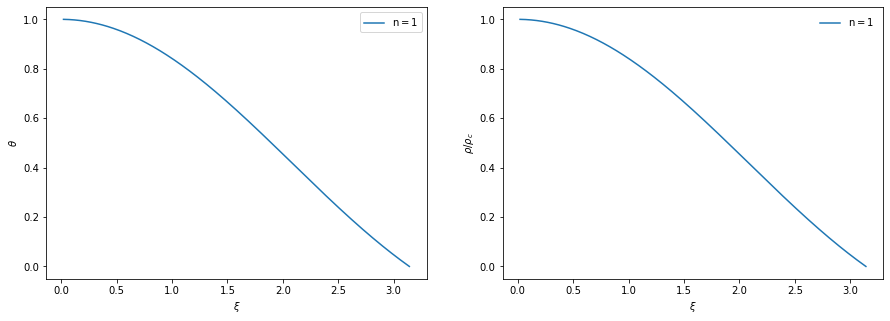

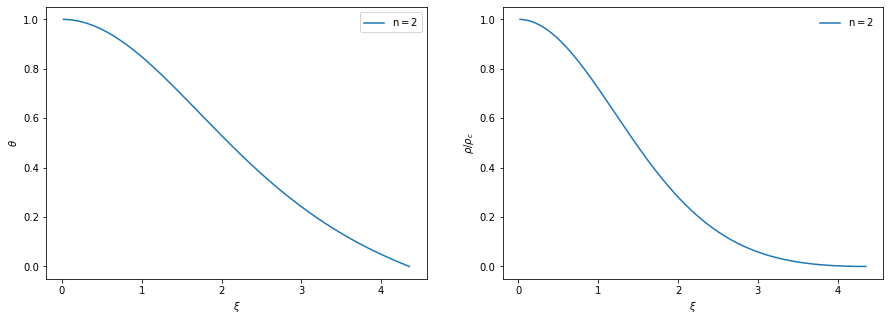

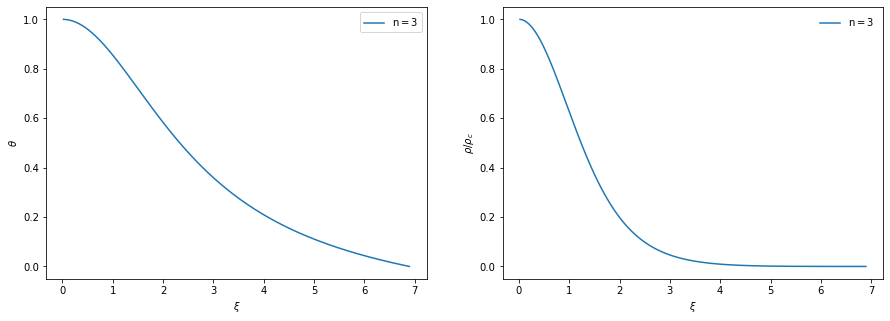

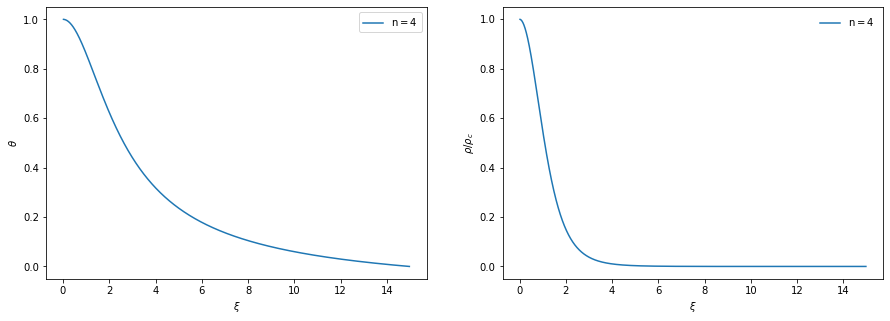

In [7]:
for i in range(5):
    p=Polytrope(i)
    fig=p.plot()

**Solución #5**

In [21]:
p=Polytrope(3)
n=3
params = p.get_params()
params

#params[0] es ultimo valor de xi
#params[1] es -xi^2 * dtheta/dxi evaluado en xi_1
#params[2] es dtheta/dxi evaluado en xi_1

Pc=(1/(4*np.pi*(n+1)))*((G*Msol**2)/(Rsol**4))*((params[2])**-2)
rhoc=np.sqrt((Pc*(n+1)/G)**(3/2)*(1/np.sqrt(4*np.pi))*(1/Msol)*params[1])
K=Pc/(rhoc**(1+(1/n)))
alpha=np.sqrt(K*(n+1)*(rhoc**((1/n)-1))/(G*4*np.pi))

print('Presión central Pc:',Pc)
print('Densidad central:',rhoc)
print('Constante K:',K)

Presión central Pc: 1.2570316638068938e+16
Densidad central: 76731.29994551594
Constante K: 163822542391.36642


**Solución #6**

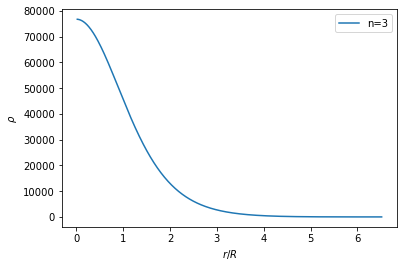

In [35]:
#params[3] es xi 
#params[4] es rho/rhoc
rho=rhoc*params[4]
plt.plot(alpha*params[3]/Rsol,rho,label='n=3')
plt.ylabel('$\\rho$')
plt.xlabel('$r/R$')
plt.legend()

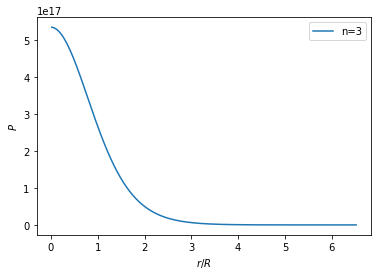

In [38]:
P=K*(rho**(1+(1/n)))
plt.plot(alpha*params[3]/Rsol,P,label='n=3')
plt.ylabel('$P$')
plt.xlabel('$r/R$')
plt.legend()

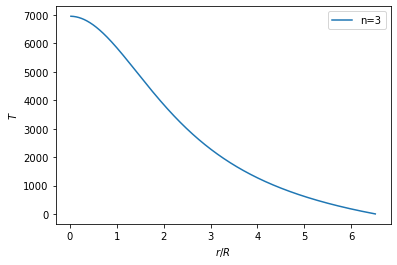

In [40]:
X=0.55
Y=0.45
mu=(2*X + (3/4)*Y)**-1
cte=K*mu/Rsol
T=cte*(rho**(1/n))
plt.plot(alpha*params[3]/Rsol,T,label='n=3')
plt.ylabel('$T$')
plt.xlabel('$r/R$')
plt.legend()

**Solución #7**

Se parte de la definición de energía gravitacional:

$$\Omega=-\int_{0}^{M}\frac{Gm}{r}dm$$

Se integra por partes:

$$\Omega=-\int_{0}^{M}\frac{Gd(m^2)}{2r}=-\frac{G}{2}\left[\left.\frac{m^2}{r}\right|_{0}^{M}-\int_{0}^{R}-\frac{m^2}{r^2}dr\right]=\frac{-GM^2}{2R}+\int_{0}^{R}\frac{Gm^2}{2r^2}dr$$

Se aplica la ecuación polítropa

$$\Omega=\frac{-GM^2}{2R}+\int_{r=0}^{r=R}\frac{m}{2\rho}dp= \frac{-GM^2}{2R}+\int_{r=0}^{r=R}\frac{m}{2\rho} k\gamma \rho^{\gamma-1}d\rho   $$

$$\Omega=\frac{-GM^2}{2R}+\frac{k\gamma}{2}\left[\left.\frac{m\rho^{\gamma-1}}{\gamma-1}\right|_{m=0}^{\rho=0}-\int_{r=0}^{r=R}\frac{\rho^{\gamma-1}}{\gamma-1}dm\right]$$

$$\Omega=\frac{-GM^2}{2R}-\frac{k\gamma}{2}\int_{0}^{R}\frac{\rho^{\gamma}}{\gamma-1}4\pi r^2dr$$


$$\Omega=-\frac{GM^2}{2R}+\frac{\gamma}{2(\gamma-1)}\int_{r=0}^{r=R}-P4\pi d(r^3/3)$$

Al integrar de nuevo por partes se obtiene lo siguiente:

$$\Omega=-\frac{GM^2}{2R}-\frac{-4\pi \gamma}{2(\gamma -1)}\left[\left(\frac{Pr^3}{3}\right)_{r=0}^{r=R}-\int_{r=0}^{r=R}\frac{r^3 (-Gm)\rho dr}{3r^2}\right]$$

Luego se sustituye $dr$ por el diferencial de masa dado por la correspondiente ecuación de estado:

$$\Omega=-\frac{GM^2}{2R}-\frac{4\pi \gamma}{6(\gamma -1)}\int_{r=0}^{r=R}rGm\rho (\frac{dm}{4\pi r^2 \rho})=-\frac{GM^2}{2R}+\frac{\gamma}{6(\gamma -1)}\int_{r=0}^{r=R}-\frac{Gmdm}{r}$$

Observese que el último término corresponde al valor de $\Omega$ que se quieres calcular, por lo cual se puede ahora despejar de la siguiente manera

$$\Omega \left(1-\frac{\gamma}{6(\gamma -1)}\right)=-\frac{GM^2}{2R}$$

$$\Omega \left(\frac{5-n}{6}\right)=-\frac{GM^2}{2R}$$

$$\Omega= -\frac{3}{5-n}\frac{GM^2}{R}$$

## Fin